<a href="https://colab.research.google.com/github/be-next/TP-IA/blob/main/K_NN_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vision par ordinateur


## Présentation

Algorithme de classification K-NN (voisin le plus proche).

Utilisation du dataset appelé "Digits", qui est une collection d'images de chiffres manuscrits.

Le dataset comporte 1797 images, chaque image possèdes 64 features qui correspondent à chacun des pixels qui composent l'image (8*8).

## Description du dataset

**Images de Chiffres Manuscrits** : Il contient des images de chiffres manuscrits (0 à 9).

**Taille des Images** : Chaque image a une résolution de 8x8 pixels. Les images sont en niveaux de gris, où chaque pixel a une valeur indiquant l'intensité de la couleur.

**Utilisation** : Le dataset est couramment utilisé dans les exercices d'introduction à l'apprentissage machine pour la reconnaissance de caractères manuscrits, en particulier pour les algorithmes de classification.

**Structure du Dataset** : En plus des images elles-mêmes, le dataset comprend des labels pour chaque image, indiquant quel chiffre (de 0 à 9) l'image représente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# import de la base de données de chiffre
digits = load_digits()
X = digits.data
y = digits.target
print('dimension de X:', X.shape)

dimension de X: (1797, 64)


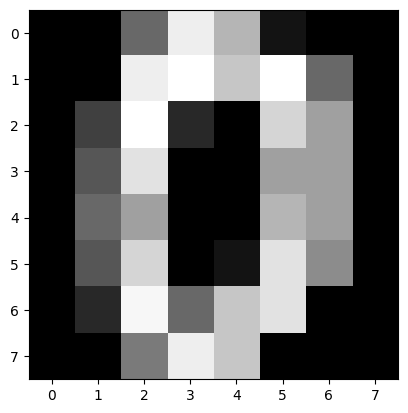

In [3]:
# visualisons un de ces chiffres
plt.imshow(digits['images'][0], cmap = 'Greys_r')

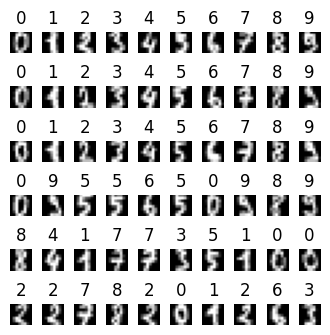

In [12]:
# Nombre d'images à afficher sur une grille
n_rows = 6
n_cols = 10

# Créer une série de sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4, 4))

# Ajuster l'espace entre les graphiques
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(n_rows * n_cols):
    ax = axes[i // n_cols, i % n_cols]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"{digits.target[i]}")
    ax.axis('off')

plt.show()

## Algorithme K-NN

Le `KNeighborsClassifier` est un algorithme de classification basé sur les voisins le plus proches, utilisé dans l'apprentissage supervisé. Voici son principe de fonctionnement de manière simplifiée :

### Choix de $K$

L'algorithme commence par la sélection d'un nombre $K$ qui représente le nombre de voisins les plus proches à considérer. $K$ est un hyperparamètre que vous devez définir.

### Calcul de la Distance

Pour classer un nouvel échantillon (un point de données non étiqueté), l'algorithme calcule la distance entre cet échantillon et tous les autres points dans l'ensemble de données d'entraînement. Les distances couramment utilisées sont la distance euclidienne, la distance de Manhattan, ou la distance de Minkowski.

### Identification des K Voisins les Plus Proches

L'algorithme identifie alors les $K$ points de données les plus proches (c'est-à-dire les points de données ayant les plus petites distances par rapport au nouvel échantillon).

### Vote Majoritaire pour la Classification

La classe du nouvel échantillon est déterminée par un vote majoritaire parmi ses $K$ voisins les plus proches. Cela signifie que l'échantillon est attribué à la classe la plus fréquente parmi ses voisins. Par exemple, si $K=5$ et trois des voisins les plus proches sont de classe $A$ et deux de classe $B$, l'échantillon sera classé comme appartenant à la classe $A$.

### Gestion des Égalités

En cas d'égalité (par exemple, si $K=4$ et qu'il y a deux voisins de classe $A$ et deux de classe $B$), il peut y avoir différentes stratégies pour trancher, comme choisir la classe du voisin le plus proche.

In [ ]:
# Entraînement du modele
model = KNeighborsClassifier()
model.fit(X, y)
model.score(X, y)

0.9905397885364496

array([3])

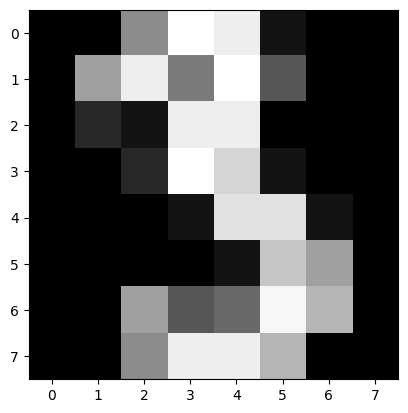

In [ ]:
#Test du modele
id_img = 3
# reshape transforme l'image (une matrice 8x8) en un vecteur ligne de 64 éléments
test = digits['images'][id_img].reshape(1, -1)
plt.imshow(digits['images'][id_img], cmap = 'Greys_r')
model.predict(test)